In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
featureName0=['VarBR','Varpp','VarIn','VarEx', 'meanBR',\
             'meanIn', 'meanEx' ,'BRcor1','ppcor1','Incor1','Excor1','BRcor3','ppcor3','Incor3','Excor3',\
            'meanHR','sdnn','rmsrr']
featureName=['CovBR','CovPP','CovIN','CovEX', 'meanBR',\
             'meanIN', 'meanEX' ,'R1 BR','R1 PP','R1 IN','R1 EX','R2 BR','R2 PP','R2 IN','R2 EX',\
            'meanHR','sdnn','rmsrr']
#scale=np.array([3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1 ,2])
#scale=np.array([3, 3, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 1 ,2])


In [2]:
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_norm.mat")
delta = data['delta2']
scale = data['scale2_n'].ravel()
group_norm = data['group_norm'].ravel()
print(scale.shape)

rkf = LeaveOneGroupOut()

acc1=[]
impt=[]
for train_ind, test_ind in rkf.split(delta,scale,group_norm):
    #print("%s %s" % (train_ind, test_ind))
    #print(test_ind)
    X_train=delta[train_ind] 
    X_test=delta[test_ind]
    y_train=scale[train_ind] 
    y_test=scale[test_ind]
    
    acc_temp=np.zeros((8,))
    impt_temp=np.zeros((8,18))
    for i in range(8):
        
        tree1 = DecisionTreeClassifier(max_depth=7).fit(X_train,y_train)
        y_p=tree1.predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
        acc_temp[i]=np.mean(acc_t)
        impt_temp[i,:]=tree1.feature_importances_


    max=np.max(acc_temp)
    ind=np.where(acc_temp == np.amax(acc_temp))
    ind=np.min(ind)
    impt_max=impt_temp[ind,:]
    acc1.append(max) 

    impt.append(impt_max)
impt=np.array(impt) 
importance1=np.mean(impt,axis=0)
seq=np.argsort(importance1)
featureName=np.array(featureName)
featureName1=featureName[seq]
importance1=importance1[seq]
importance1=np.flip(importance1)
featureName1=np.flip(featureName1)
#print(acc)
acc1=np.array(acc1)
acc1_mean=np.mean(acc1)
print(np.mean(acc1))
#classNames=['norm','weak','moderate','severe']

print(importance1)
print(featureName1)



(88,)
0.8185185185185186
[0.18171346 0.15607419 0.11554638 0.06497878 0.06405562 0.06329161
 0.0575678  0.05010119 0.04358693 0.03442747 0.03441319 0.02961064
 0.02778056 0.02714588 0.01930359 0.01325355 0.00984443 0.00730471]
['R1 BR' 'R2 BR' 'meanHR' 'R1 PP' 'R1 IN' 'meanBR' 'R1 EX' 'rmsrr' 'CovEX'
 'meanEX' 'sdnn' 'CovIN' 'CovPP' 'R2 EX' 'CovBR' 'meanIN' 'R2 PP' 'R2 IN']


In [3]:



data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_wo.mat")
delta_wo = data['delta2']
scale_wo = data['scale2_n'].ravel()
group_wo = data['group_wo'].ravel()
print(delta_wo.shape)
rkf = LeaveOneGroupOut()

acc2=[]
impt=[]
for train_ind, test_ind in rkf.split(delta_wo,scale_wo,group_wo):
    #print("%s %s" % (train_ind, test_ind))
    #print(test_ind)
    X_train=delta_wo [train_ind] 
    X_test=delta_wo [test_ind]
    y_train=scale_wo [train_ind] 
    y_test=scale_wo [test_ind]
    
    acc_temp=np.zeros((8,))
    impt_temp=np.zeros((8,18))
    for i in range(8):
        
        tree1 = DecisionTreeClassifier(max_depth=8).fit(X_train,y_train)
        y_p=tree1.predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/2
        acc_temp[i]=np.mean(acc_t)
        impt_temp[i,:]=tree1.feature_importances_


    max=np.max(acc_temp)
    ind=np.where(acc_temp == np.amax(acc_temp))
    ind=np.min(ind)
    impt_max=impt_temp[ind,:]
    acc2.append(max) 

    impt.append(impt_max)
impt=np.array(impt) 
importance2=np.mean(impt,axis=0)
seq=np.argsort(importance2)
featureName=np.array(featureName)
featureName2=featureName[seq]
importance2=importance2[seq]
importance2=np.flip(importance2)
featureName2=np.flip(featureName2)
#print(acc)
acc2=np.array(acc2)
acc2_mean=np.mean(acc2)
print(acc2_mean)
#classNames=['norm','weak','moderate','severe']

print(importance2)
print(featureName2)

(58, 18)
0.8166666666666667
[0.41671055 0.27310408 0.06568391 0.03118406 0.02618559 0.02361938
 0.02344502 0.02314489 0.02237892 0.01844162 0.01631801 0.013249
 0.01246199 0.01044598 0.01012672 0.00746041 0.00603987 0.        ]
['R1 BR' 'R2 BR' 'R1 IN' 'CovBR' 'meanEX' 'R1 EX' 'meanBR' 'sdnn' 'rmsrr'
 'R2 EX' 'CovPP' 'CovIN' 'R2 PP' 'CovEX' 'R2 IN' 'R1 PP' 'meanIN' 'meanHR']


In [4]:


rkf = LeaveOneGroupOut()
acc3=[]
impt=[]
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data01.mat")
feat = data['feat2']
scale_feat = data['scale2_n'].ravel()
group = data['group'].ravel()

for train_ind, test_ind in rkf.split(feat,scale_feat,group):
    #print("%s %s" % (train_ind, test_ind))
    #print(scale[test_ind])
    X_train=feat[train_ind] 
    X_test=feat[test_ind]
    y_train=scale_feat[train_ind] 
    y_test=scale_feat[test_ind]
    
    acc_temp=np.zeros((10,))
    acc_temp=np.zeros((10,))
    impt_temp=np.zeros((10,18))
    for i in range(10):
        
        tree3 = DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)
        y_p=tree3.predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
        acc_temp[i]=np.mean(acc_t)
        impt_temp[i,:]=tree3.feature_importances_


    max=np.max(acc_temp)
    ind=np.where(acc_temp == np.amax(acc_temp))
    ind=np.min(ind)
    impt_max=impt_temp[ind,:]
    acc3.append(max) 

    impt.append(impt_max)
impt=np.array(impt) 
importance3=np.mean(impt,axis=0)
seq=np.argsort(importance3)
featureName=np.array(featureName)
featureName3=featureName[seq]
importance3=importance3[seq]
importance3=np.flip(importance3)
featureName3=np.flip(featureName3)
#print(acc)
acc3=np.array(acc3)
acc3_mean=np.mean(acc3)
print(acc3_mean)
#classNames=['norm','weak','moderate','severe']

print(importance3)
print(featureName3)


0.7203703703703705
[0.25641321 0.17332175 0.13581208 0.10571374 0.07501802 0.04596326
 0.03504733 0.02520597 0.02438197 0.02060335 0.019503   0.01939133
 0.01474754 0.01232617 0.01064326 0.01033272 0.01003055 0.00554475]
['rmsrr' 'CovBR' 'sdnn' 'meanHR' 'meanBR' 'R2 IN' 'R2 PP' 'meanEX'
 'meanIN' 'CovIN' 'CovEX' 'R2 BR' 'R1 IN' 'CovPP' 'R1 EX' 'R2 EX' 'R1 BR'
 'R1 PP']


acc1_mean=0.819
FeatureImportance1:
R1 BR=0.182
R2 BR=0.156
meanHR=0.116
R1 PP=0.065
acc2_mean=0.82
FeatureImportance2:
R1 BR=0.417
R2 BR=0.273
R1 IN=0.066
CovBR=0.031
acc3_mean=0.72
FeatureImportance3:
rmsrr=0.256
CovBR=0.173
sdnn=0.136
meanHR=0.106


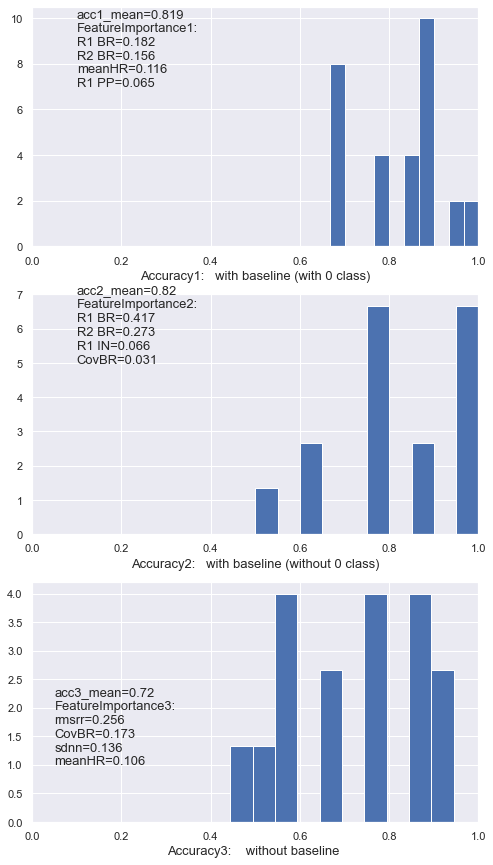

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={"figure.figsize": (8, 15)}); np.random.seed(0)
size=13
s1='acc1_mean={n:.3f}\nFeatureImportance1:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc1_mean,n1=featureName1[0],s1=importance1[0],
    n2=featureName1[1],s2=importance1[1],n3=featureName1[2],s3=importance1[2],n4=featureName1[3],s4=importance1[3])
s2='acc2_mean={n:.2f}\nFeatureImportance2:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc2_mean,n1=featureName2[0],s1=importance2[0],
    n2=featureName2[1],s2=importance2[1],n3=featureName2[2],s3=importance2[2],n4=featureName2[3],s4=importance2[3])
s3='acc3_mean={n:.2f}\nFeatureImportance3:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc3_mean,n1=featureName3[0],s1=importance3[0],
    n2=featureName3[1],s2=importance3[1],n3=featureName3[2],s3=importance3[2],n4=featureName3[3],s4=importance3[3])
plt.figure(1)
plt.subplot(3,1,1)
# ax = sns.distplot(acc1,hist=True)
plt.hist(acc1, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy1:   with baseline (with 0 class)',fontsize=size)
plt.text(0.1,7,s1,fontsize=size)
plt.subplot(3,1,2)
plt.hist(acc2,density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy2:   with baseline (without 0 class)',fontsize=size)
plt.text(0.1,5,s2,fontsize=size)
plt.subplot(3,1,3)
plt.hist(acc3,density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy3:    without baseline ',fontsize=size )
plt.text(0.05,1,s3,fontsize=size)

plt.savefig(r"C:\Sleep test\dyspnea\data\all\plot\acc_group.png",dpi=300)
print(s1)
print(s2)
print(s3)